# MORPHOLOGIC OPERATIONS - OpenCV

Do you need help get rid of noise in certain images or maybe help with edge detection?

So here are morphological operators that we're going to cover in this lecture.


#### INDEX: 

00 step - Utility Functions

01 step - Loading & Display The Image to Work With

02 step - Resizing Images

03 step - Morphological Operations
          
          A - Erosion
          
          B - Dilation
          
          C - Remove Background Noise From WHITE_NOISE - OPENING
          
          D - Remove Foreground Noise From BLACK_NOISE - CLOSING
          
          E - Gradient - EDGE DETECTION


## 00 step - Utility Functions

In [6]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def load_img():
    blank_img = np.zeros(shape=(600,600), dtype=np.int16)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(40,350), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

## 01 step - Loading & Display The Image to Work With

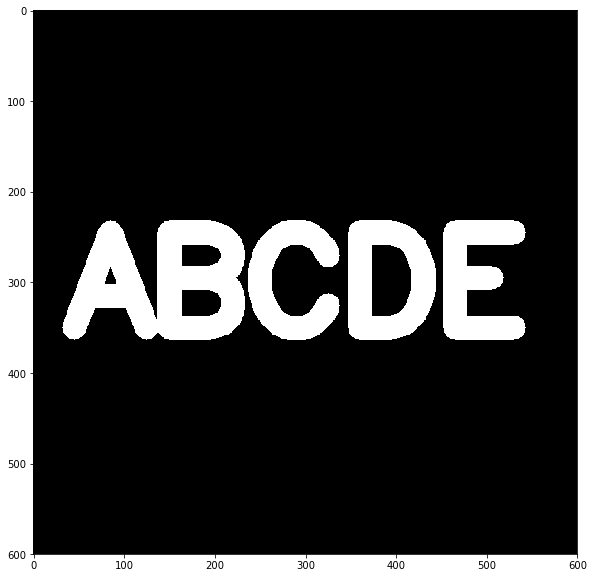

In [4]:
img = load_img()
display_img(img)

In [5]:
img.shape

(600, 600)

## 02 step - Resizing Images

In [6]:
img = cv2.resize(img, (255,255))

In [7]:
img.shape

(255, 255)

In [8]:
img_copy = img.copy()

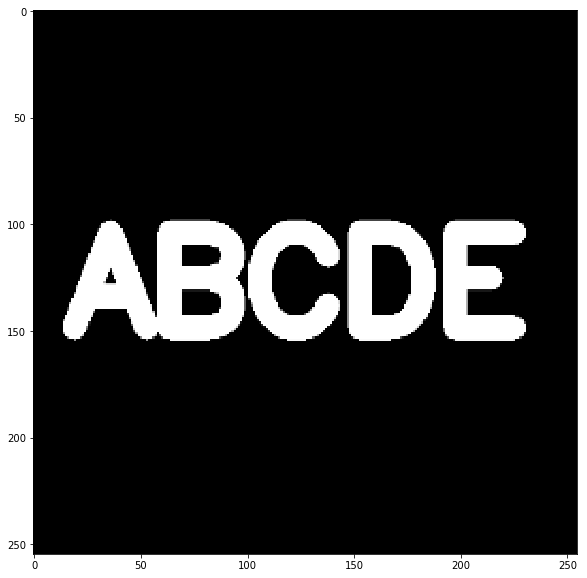

In [9]:
display_img(img_copy)

In [10]:
type(img_copy)

numpy.ndarray

## 03 step - Morphological Operations

In [11]:
kernel = np.ones((5,5), dtype=np.uint8)

#### A  - Erosion

In [12]:
result = cv2.erode(img_copy, kernel, iterations=2)

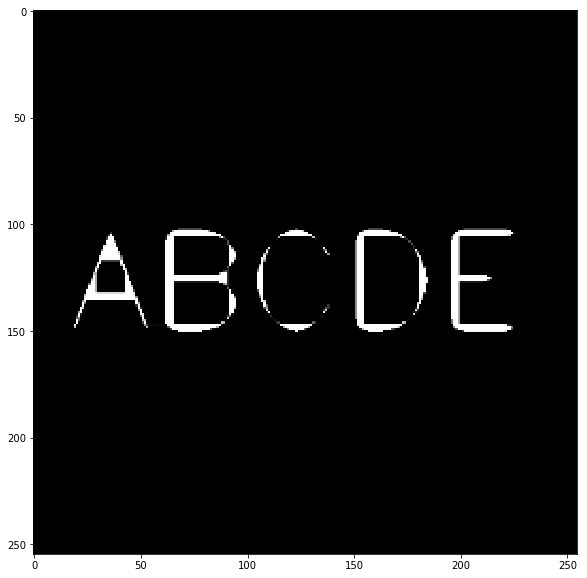

In [13]:
display_img(result)

#### B  - Dilation

In [14]:
result = cv2.dilate(img, kernel, iterations=2)

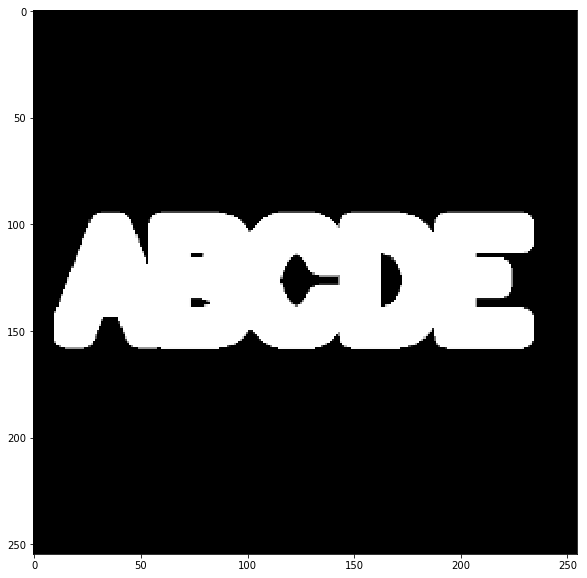

In [15]:
display_img(result)

#### C - Remove Background Noise From WHITE_NOISE - OPENING

In [16]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [17]:
# BACKGROUND NOISE
white_noise = white_noise * 255

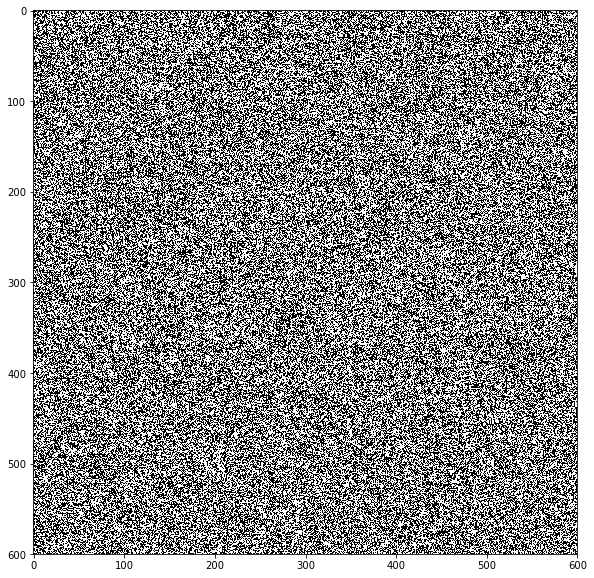

In [18]:
display_img(white_noise)

In [19]:
white_noise.shape

(600, 600)

In [20]:
type(white_noise)

numpy.ndarray

In [21]:
img = load_img()

In [22]:
# blended = cv2.addWeighted(src1=img, alpha=0.5, src2=white_noise, beta=0.5, gamma=0)
# https://stackoverflow.com/questions/61583991/opencv-python-error-unsupported-data-type-4-in-function-cvopt-avx2getmo
noise_img = white_noise + img
noise_img = noise_img.astype('uint8') 

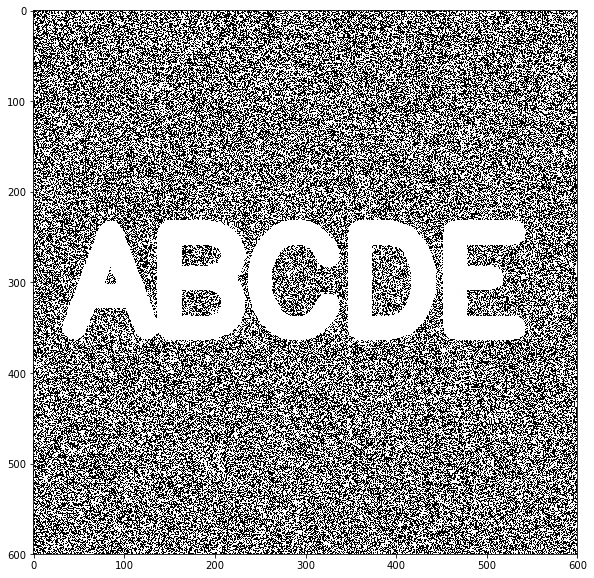

In [23]:
display_img(noise_img)

In [24]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

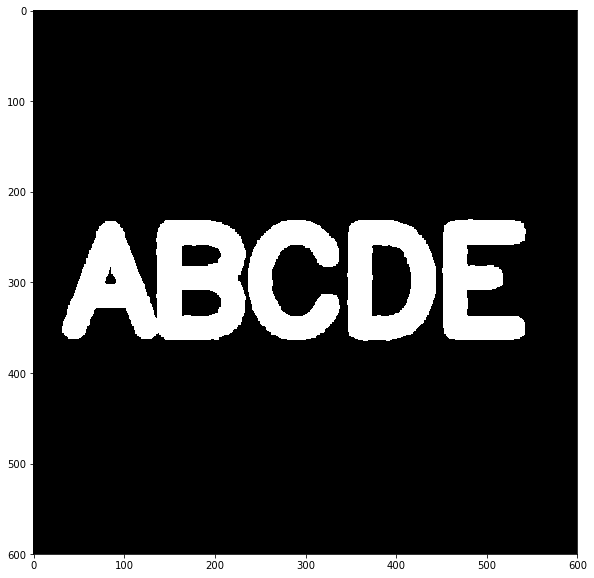

In [25]:
display_img(opening)

#### D - Remove Foreground Noise From BLACK_NOISE - CLOSING

In [26]:
img = load_img()

In [27]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [28]:
black_noise = black_noise * -255

In [29]:
black_noise.min()

-255

In [30]:
noise_img = black_noise + img
noise_img = noise_img.astype('uint8') 

In [31]:
noise_img[noise_img==-255] = 0

In [32]:
black_noise.min()

-255

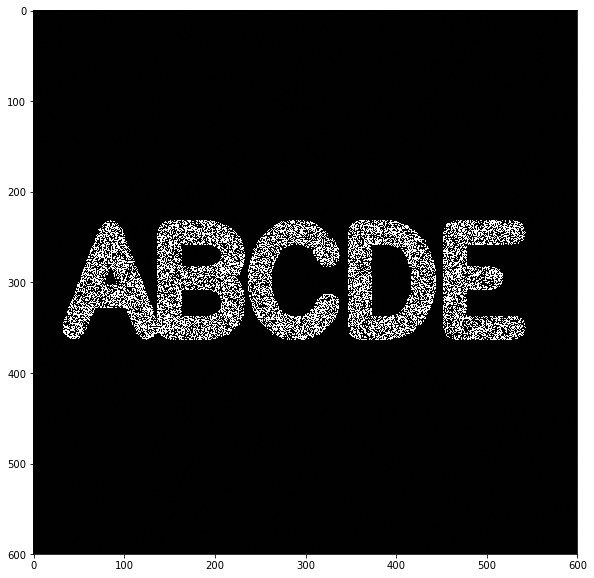

In [33]:
display_img(noise_img)

In [34]:
# So previously we had a bunch of noise in the BACKGROUND
# Now we have a bunch of noise soly in the FOREGROUND
# AND CLOSING is a good way of getting rid of this
closing = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)

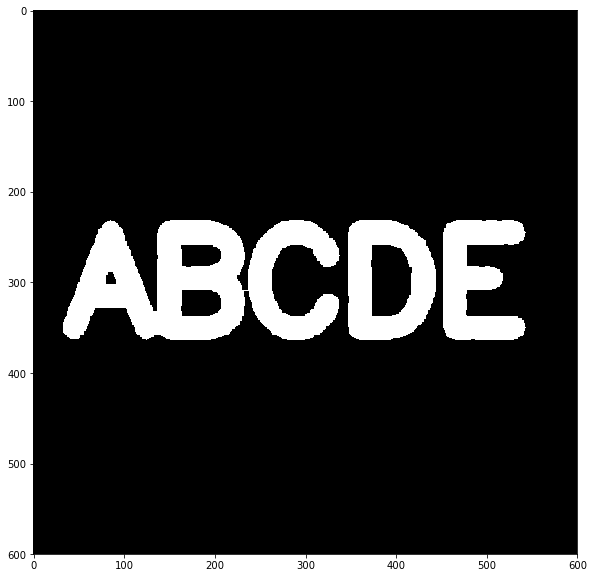

In [35]:
display_img(closing)

#### E - Gradient  - EDGE DETECTION

In [36]:
img = load_img()

In [37]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

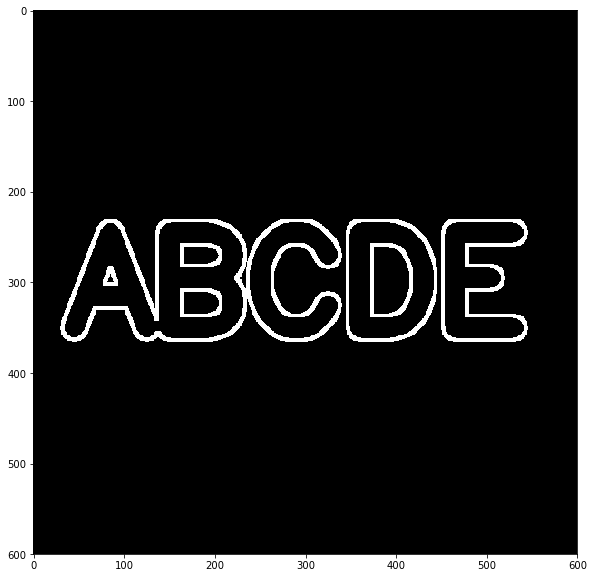

In [38]:
display_img(gradient)

In [39]:
print("That´s it! Thank you once again!\nI hope will be helpful.")

That´s it! Thank you once again!
I hope will be helpful.
